# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [2]:
%pylab inline

#import random
dim = int(1000)

#my code:
vec = (random.rand(1000)*100).tolist()
(type(vec))

Populating the interactive namespace from numpy and matplotlib


list

In [3]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [4]:
def p_norm(vector,p):
    
    if p <= 0:
        print ("Hey! Dividing by zero implodes the universe and create black holes. Don't. (p>0 please)")
        return
    try:    
        norm=0.0
        for item in vector:
            norm+=item**p
        return norm**(1/p)
    
    except ZeroDivisionError: 
            print("ZeroDivisionError: Hey! Dividing by zero implodes the universe.")
    except AssertionError:
            print("Ugly assertion error.")
        
        
   

In [5]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [6]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [7]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

Hey! Dividing by zero implodes the universe and create black holes. Don't. (p>0 please)


AssertionError: AssertionError not raised by p_norm

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [87]:
def FD(f, x, h):
    
    if callable(f)==False:
        print ("f not a function")
        return
    
    try:
        result = (f(x+h)-f(x))/h
        return result
            
    
    except:
        print ("Something is fishy. the first argument must be a function, the third must be not zero")


2.0000009999243673

In [70]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [17]:
h=1/10**(arange(21))
h

#generates bad values for i = {-19 , -20}. Opted for explicit initialization.

array([ 1.00000000e+00,  1.00000000e-01,  1.00000000e-02,  1.00000000e-03,
        1.00000000e-04,  1.00000000e-05,  1.00000000e-06,  1.00000000e-07,
        1.00000000e-08,  1.00000000e-09,  1.00000000e-10,  1.00000000e-11,
        1.00000000e-12,  1.00000000e-13,  1.00000000e-14,  1.00000000e-15,
        1.00000000e-16,  1.00000000e-17,  1.00000000e-18, -1.18388812e-19,
        1.28761781e-19])

In [43]:
# overwriting h with explicit initialization

h=(1,    1e-1, 1e-2, 1e-3, 1e-4, 
   1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 
   1e-10,1e-11,1e-12,1e-13,1e-14, 
   1e-15,1e-16,1e-17,1e-18,1e-19, 1e-20)
h= array(h)
h
#raise NotImplementedError()

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15,
       1.e-16, 1.e-17, 1.e-18, 1.e-19, 1.e-20])

In [44]:
def function(x):
    return sin(x)

fd1 = FD(function, 1, h)

fd1

#looks ok, the error below was unexpected.    

array([0.06782644, 0.49736375, 0.53608598, 0.53988148, 0.54026023,
       0.5402981 , 0.54030189, 0.54030226, 0.5403023 , 0.54030236,
       0.54030225, 0.54030114, 0.54034555, 0.53956839, 0.54400928,
       0.55511151, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [45]:
#assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

#but it works for 2 decimals...Can't say why, really.

AssertionError: 
Arrays are not almost equal to 4 decimals

(mismatch 4.761904761904759%)
 x: array([0.0678, 0.4974, 0.5361, 0.5399, 0.5403, 0.5403, 0.5403, 0.5403,
       0.5403, 0.5403, 0.5403, 0.5403, 0.5403, 0.5396, 0.544 , 0.5551,
       0.    , 0.    , 0.    , 0.    , 0.    ])
 y: array([0.0678, 0.4974, 0.5361, 0.5399, 0.5403, 0.5403, 0.5403, 0.5403,
       0.5403, 0.5403, 0.5403, 0.5403, 0.5403, 0.5396, 0.5329, 0.5551,
       0.    , 0.    , 0.    , 0.    , 0.    ])

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

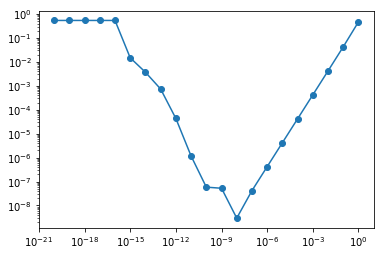

In [51]:
error = abs(FD(function,1,h) -cos(1.0))

loglog(h,error, "-o")

# raise NotImplementedError()

YOUR ANSWER HERE

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

(1e-09, 1e-05)

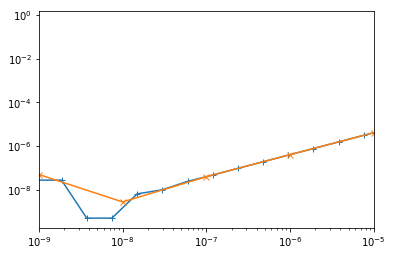

In [111]:
# generating base 2 h deltas

h2=1/2**(arange(61))

#computing errors

fd2 = FD(function, 1, h2)
error2 = abs(FD(function,1,h2) -cos(1.0))

# plotting errors

loglog(h2, error2, "-+") ## base 2 errors, blue
loglog(h, error, "-x")   ## base 10 errors, orange
xlim(10e-10, 10e-6)  # zoom on change


##### comment:

The effect is quite similar, but when deltas are expressed as powers of 2, the better step let the computer approach the machine precision(between $10^{-8}$ and $10^{-9}$).

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [96]:
def CFD(f, x, h):
    
    if callable(f)==False:
        print ("f not a function")
        return
    
    try:
        result = (f(x+h)-f(x-h))/(2*h)
        return result
            
    
    except:
        print ("Something is fishy. the first argument must be a function, the third must be not zero")




In [97]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

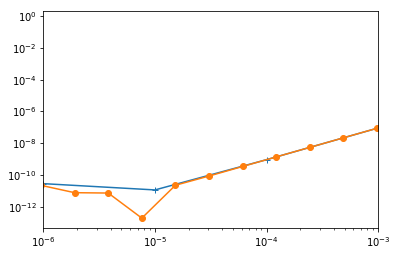

In [113]:
cfd1 = CFD(function, 1, h)  #base 10
cfd2 = CFD(function, 1, h2) #base 2

error1 = abs(CFD(function,1,h) -cos(1.0))
error2 = abs(CFD(function,1,h2) - cos(1.0)) 

plt.xlim(10e-7, 10e-4)
plt.loglog(h, error1, "-+")
plt.loglog(h2, error2, "-o")

# raise NotImplementedError()

##### comment:

In CFD we can obtain less precision ( $~10^{-5}$ ) before unstability.

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [130]:
from numpy import *

x = arange(64)
x
#raise NotImplementedError()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [128]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)            
#for i in xrange(64):           ## deprecated in Python3.x
for i in arange(64):            ## I took the liberty to fix here.
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [147]:
y = x.reshape(4,-1)
y
# raise NotImplementedError()

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

In [134]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [176]:
sl1 = y[:,0:3]
sl2 = y[0:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]
#raise NotImplementedError()

In [177]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [180]:
z = x.reshape(4,-1, order="F")
#raise NotImplementedError()
z

array([[ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60],
       [ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61],
       [ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62],
       [ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63]])

Comment on the result, what has changed with respect to `y`? 

##### comment:

Elements are inserted into the database by column, and not by row. I expect this procedure to be slower than the default, C-style, insertion.

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [182]:
x[3] = 666666
#raise NotImplementedError()
(x,y,z)

(array([     0,      1,      2, 666666,      4,      5,      6,      7,
             8,      9,     10,     11,     12,     13,     14,     15,
            16,     17,     18,     19,     20,     21,     22,     23,
            24,     25,     26,     27,     28,     29,     30,     31,
            32,     33,     34,     35,     36,     37,     38,     39,
            40,     41,     42,     43,     44,     45,     46,     47,
            48,     49,     50,     51,     52,     53,     54,     55,
            56,     57,     58,     59,     60,     61,     62,     63]),
 array([[     0,      1,      2, 666666,      4,      5,      6,      7,
              8,      9,     10,     11,     12,     13,     14,     15],
        [    16,     17,     18,     19,     20,     21,     22,     23,
             24,     25,     26,     27,     28,     29,     30,     31],
        [    32,     33,     34,     35,     36,     37,     38,     39,
             40,     41,     42,     43,     44,     45

##### comment:

Every array changed because, in Python, arrays are reference types, as all mutable variables. When I modified x[3], I modified the dereferenced value to a different literal. Hence, in all arrays, the reference pointed to a different value, in the same location.

To avoid that, I should have copied the array with y.copy(x).

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [208]:
A = 4*ones((2,3))+1
B = 3*ones((3,4))+3


C=A.dot(B)

#raise NotImplementedError()

In [209]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

##### comment:
C is the result of a matrix-matrix product between A and B.

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [210]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

##### comment:

Returning a ValueError exception, because by default python tried to perform a element-wise multiplication. To be able to perform it, Numpy tried to broadcast an array into the other. To have a successful broadcast for every dimension the size must be the same, or equal to 1.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [212]:
A = matrix(A)  # overwriting
B = matrix(B)

C=A*B
C

#raise NotImplementedError()

matrix([[90., 90., 90., 90.],
        [90., 90., 90., 90.]])

In [ ]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

##### comment:

Differently from np.arrays, matrix type doesn't perform elementwise multiplication, and the star operator is not overloaded to broadcast.

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


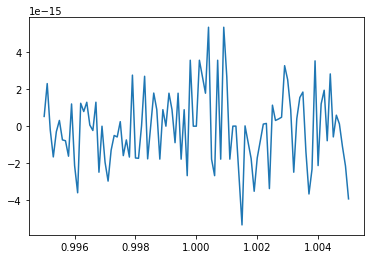

In [230]:
x = linspace(0.995, 1.005, 101)

y_compr = (1-x)**6
y_expan = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

fig = plot(x,y_compr-y_expan)


#raise NotImplementedError()

##### comment:

Truncation errors and rounding errors are differently composed in the two functions, hence giving differences in the results.

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [ ]:
def lagrange_basis(xi, i, x):
    '''
    input: xi = array of x_i points
    i         = grade of Lagrange polynomial
    x         = evaluation point
    
    
    
    '''
    
    
    raise NotImplementedError()

In [ ]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [ ]:
def lagrange_interpolation(xi,f):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'